In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('/content/drive/MyDrive/laptop_data.csv')

In [85]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [86]:
df.shape

(1303, 12)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [88]:
df.duplicated().sum()# if two col are same then sum would return 1

0

In [89]:
df.isnull().sum() # to check whether their are missig values or not

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [90]:
# Data PreProcessing & Feature Eng


In [91]:
df.drop(columns=['Unnamed: 0'],inplace=True) # Removing unamed column from data set

In [92]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [93]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [94]:
df['Weight'] = df['Weight'].str.replace('kg','')# Removing Kg from Weight -> float)

In [95]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [96]:
df['Ram'] = df['Ram'].astype('int32')

In [97]:
df['Weight'] = df['Weight'].astype('float32')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [99]:
# Data Analysis


In [100]:
import seaborn as sns

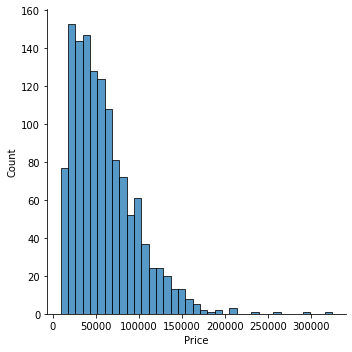

In [101]:
sns.displot(df['Price']) # Ploting Price Column data 
# data is skwed -> some laptops are cheaper & some are having high price

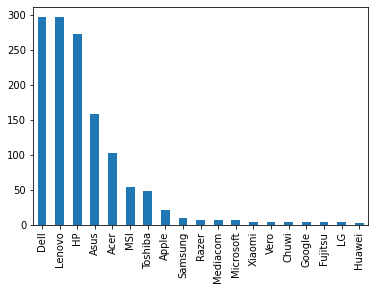

In [102]:
df['Company'].value_counts().plot(kind='bar') # Ploting each company`s laptop

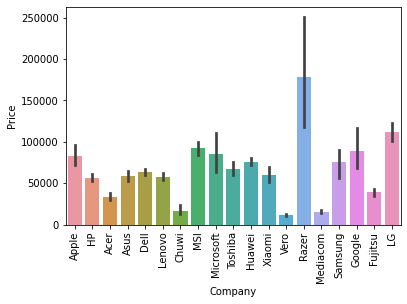

In [103]:
# average price of each laptop
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# showing which laptop is cheaper & costlier

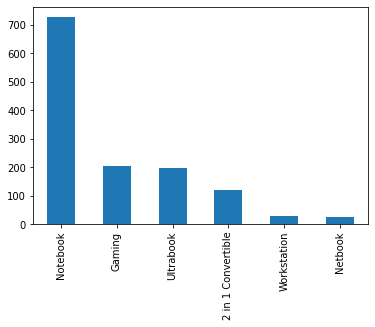

In [104]:
# Displaying which type of laptops we have
df['TypeName'].value_counts().plot(kind='bar')

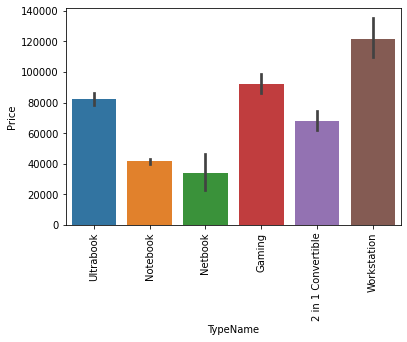

In [105]:
# price of each type of laptop
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


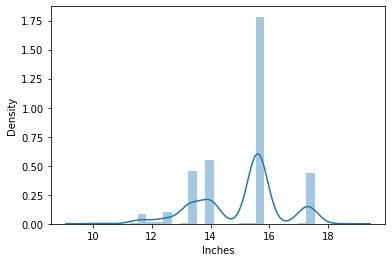

In [106]:
sns.distplot(df['Inches'])

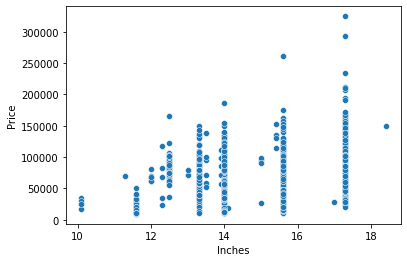

In [107]:
# as laptop`s size inc -> price inc
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [108]:
# types 
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [109]:
# if laptop is touchscreen or not
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1070,Dell,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1
626,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,12733.9200,0
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,26586.7200,0
171,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,37242.7200,0
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0
375,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,1.91,26053.3872,0
672,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.30,55091.5200,1
1128,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,52693.9200,0
772,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.75,54345.6000,0


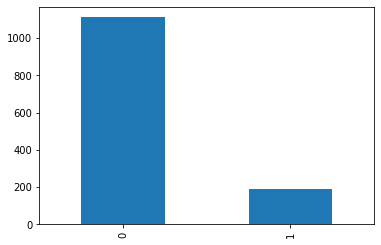

In [110]:
# 0 -> Non Touch Screen Laptops
# 1 -> Touch Screen Laptops
df['Touchscreen'].value_counts().plot(kind='bar')

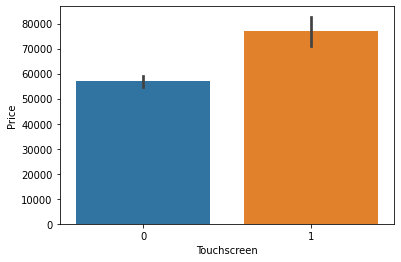

In [111]:
# to see price of touch screen & non-screen laptop
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [112]:
# Same as  Touch Screen & Non Touch Screen
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


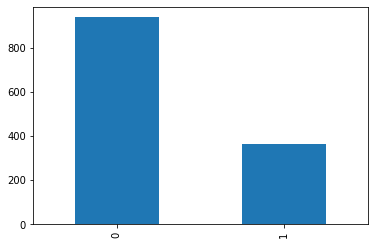

In [113]:
# 0 -> Non IPS Screen Laptops
# 1 -> IPS Screen Laptops
df['Ips'].value_counts().plot(kind='bar')

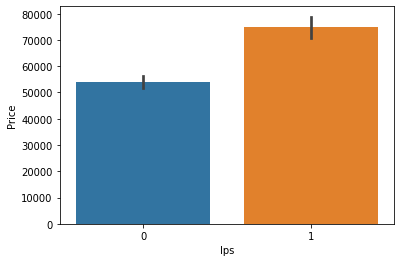

In [114]:
# Price Distribution of IPS & Non IPS Laptops
sns.barplot(x=df['Ips'],y=df['Price'])

In [115]:
# Now we have to get Resolution of laptops in x & y two different columns
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [116]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [117]:
# now as in X_res col we have string & num both -> to extract num(x resolution) we will write regular expression
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [118]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [119]:
# converting data type of X_res & Y_res col -> int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [120]:
# Checking co-relation of Price with other attributes of data set
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [121]:
# creating a new attribute(PPI-Pixels Per Inches) which will have strong dependency with (Inches,X_res,Y_res)
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [122]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [123]:
# Removing extra attributes from table
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [127]:
# CPU Column -> Data PreProcessing

In [126]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [128]:
# Extracting 1st Three words
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [129]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [131]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


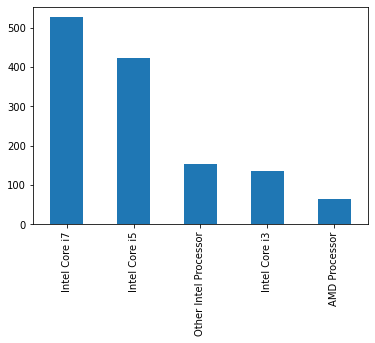

In [132]:
df['Cpu brand'].value_counts().plot(kind='bar')

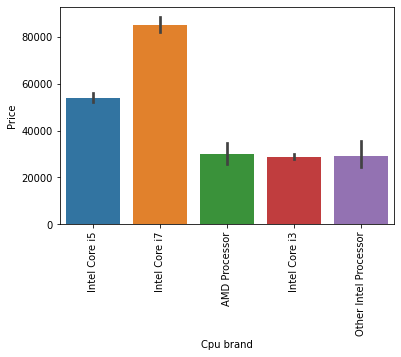

In [133]:
# CPU Brand VS its Price
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [134]:
# Droping Columns
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
# RAM -> Data PreProcessing

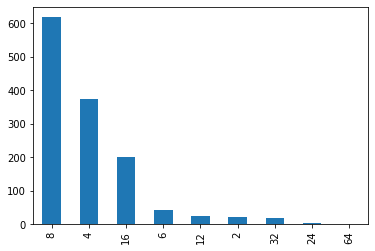

In [137]:
df['Ram'].value_counts().plot(kind='bar')

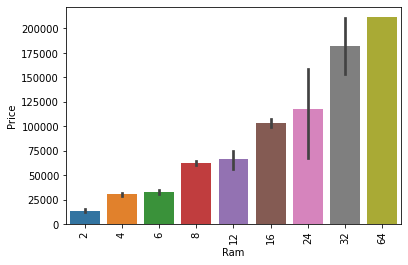

In [136]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [138]:
# Memory Column -> Data PreProcessing _> Creating 4 new Columns(HDD,SSD,Hybrid,Flash Storage)

In [139]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [140]:
df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [141]:
df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

<ipython-input-141-6f7c68ee0eba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [142]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0 )

In [143]:
df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

<ipython-input-143-34fddff09e6d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [144]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [145]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [146]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [147]:
df.drop(columns=['Memory'],inplace=True)

In [148]:
# Checking correaltion btwn new attributes
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [149]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [150]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [151]:
# GPU -> Data PreProcessing

In [152]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Getting Brand Name

In [153]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [154]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [155]:
# Removing last value as it does not contribute to the value
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

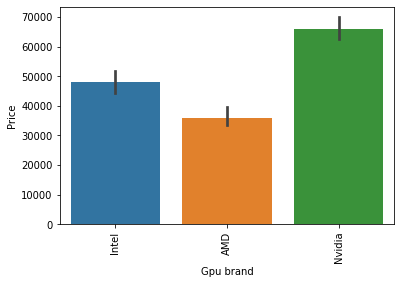

In [156]:
# Checking Price VS GPU Brands
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [157]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [158]:
# OS -> Data PreProcessing

In [159]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

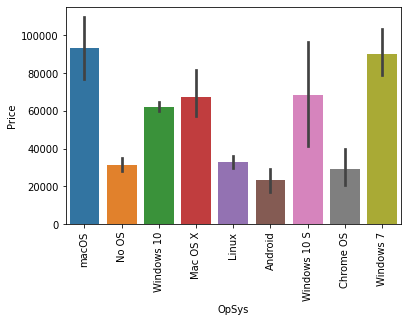

In [160]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [161]:
# Grouping the attributes
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [162]:
df['os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [163]:
df.drop(columns=['OpSys'],inplace=True)

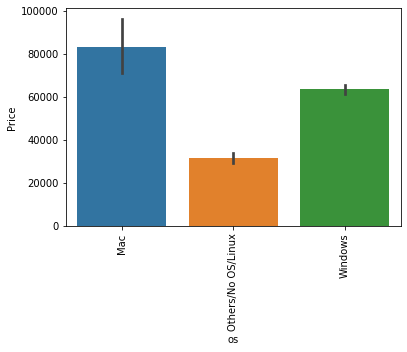

In [164]:
# Now we have categorized OS into 3 groups
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [165]:
# Weight -> Data PreProcessing

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


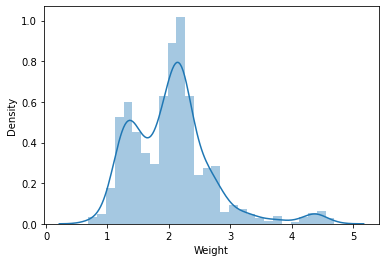

In [166]:
sns.distplot(df['Weight'])

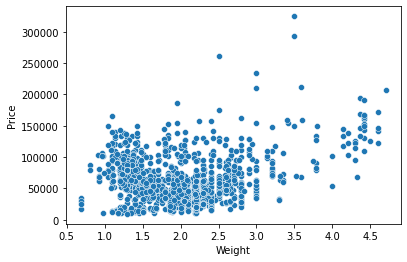

In [167]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [168]:
# Checking Correaltion with Weight
df.corr()['Weight']

Ram            0.383362
Weight         1.000000
Price          0.209867
Touchscreen   -0.293004
Ips            0.018643
ppi           -0.321883
HDD            0.514147
SSD           -0.063818
Name: Weight, dtype: float64

In [169]:
# Checking correlation of all attributes with each other
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


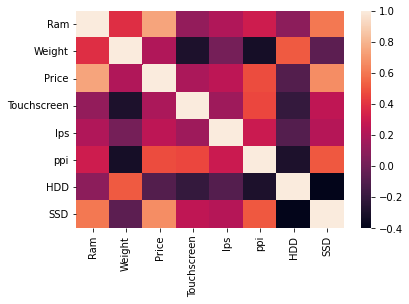

In [171]:
# Lighter Shade -> Strong Relation
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


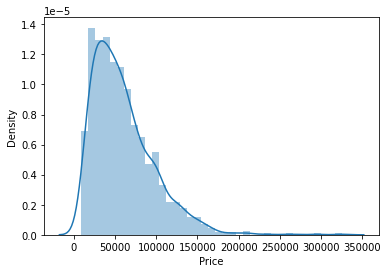

In [173]:
# Transformation 
sns.distplot(df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


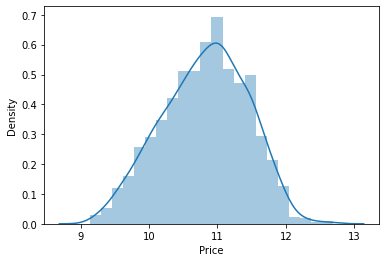

In [174]:
sns.distplot(np.log(df['Price']))

In [175]:
X = df.drop(columns=['Price'])# 12 Independent Attributes
y = np.log(df['Price'])# 1 Dependent Attributes

In [177]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [179]:
y


0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [180]:
# Model Training


In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [182]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [183]:
# Column Transformer along with sykit pipline

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [185]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear regression

In [186]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418642
MAE 0.2101782797642883


In [190]:
#MAE -> Mean Absolute Error
# Error of Rs -> 1.23
np.exp(0.2101782797642883)

1.233898019397056

# Ridge Regression

In [188]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


In [191]:
np.exp(0.20926802242582968)

1.23277536569939

# Random Forest

In [196]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


In [193]:
np.exp(0.15860130110457718)

1.171870630001826

# Gradient Boost

In [194]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8814026527992331
MAE 0.15975936952084865


In [195]:
np.exp(0.15975936952084865)

1.1732285224808252

# Exporting The Model

In [201]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [199]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
